In [1]:
import requests
import zipfile
import pandas as pd
import numpy as np
import os
import nibabel
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
url = 'http://www.fil.ion.ucl.ac.uk/spm/download/data/MoAEpilot/MoAEpilot.zip'
data = requests.get(url)

# Check if the targed folder for storing the data already exists. If not create it and save the zip file.
if os.path.exists('./fMRI_data') == False:
    os.mkdir('fMRI_data')
    
open('./fMRI_data/data.zip', 'wb').write(data.content)

# Un-zip the file
zip_ref = zipfile.ZipFile('./fMRI_data/data.zip', 'r')
zip_ref.extractall('./fMRI_data/')
zip_ref.close()

BadZipFile: File is not a zip file

In [4]:
# import os
# import shutil

# # Delete the ZIP file
# os.remove('./fMRI_data/data.zip')

# # Delete the extracted folder and its contents
# shutil.rmtree('./fMRI_data')

In [4]:
# Define the path to structural data
data_path = './fMRI_data/sM00223/'

# Get all files in the directory
files = os.listdir(data_path)

# Initialize list to store loaded image data
data_all = []

# Loop through files and load .hdr images
for data_file in files:
    if data_file.endswith('.hdr'):
        hdr_path = os.path.join(data_path, data_file)
        img = nibabel.load(hdr_path)
        data = img.get_fdata()  # safer than .get_data()
        data_all.append(data)
  

In [5]:
print(data.shape)

(256, 256, 54, 1)


In [10]:
data = np.rot90(data.squeeze(), 1)
print(data.shape)

(256, 256, 54)


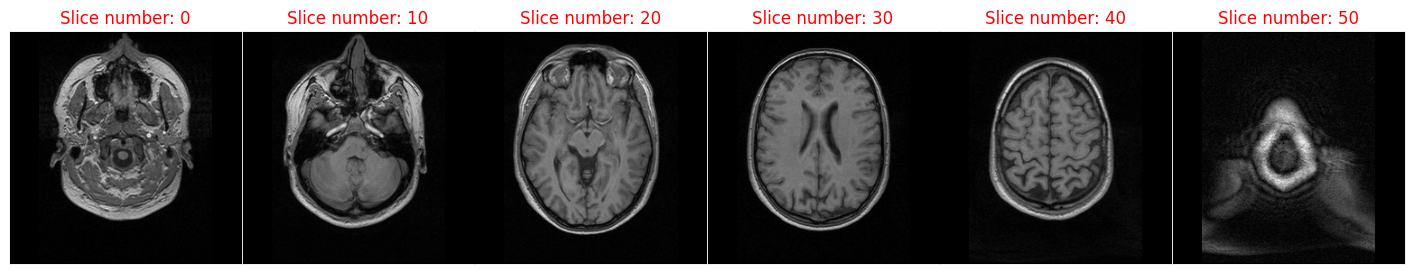

In [11]:
fig, ax = plt.subplots(1, 6, figsize=[18,3])
n = 0
slice = 0
for n in range(6):
    ax[n].imshow(data[:, :, slice], cmap= 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title('Slice number: {}'.format(slice), color='r')
    n += 1
    slice += 10
    
fig.subplots_adjust(wspace=0, hspace=0)
plt.show()